# Lesson 5 Locally Linear Embedding

Takes your n-dimensional data and projects it onto lower dimensional space that preserves distances between points as best as possible using a weighted approximation technique.

In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import LocallyLinearEmbedding

import matplotlib.pyplot as plt
import seaborn as sns

# 

In [35]:
df = pd.read_csv("crabs.csv")
df.shape
df.head
df.tail

<bound method NDFrame.tail of      rownames sp sex  index    FL    RW    CL    CW    BD
0           1  B   M      1   8.1   6.7  16.1  19.0   7.0
1           2  B   M      2   8.8   7.7  18.1  20.8   7.4
2           3  B   M      3   9.2   7.8  19.0  22.4   7.7
3           4  B   M      4   9.6   7.9  20.1  23.1   8.2
4           5  B   M      5   9.8   8.0  20.3  23.0   8.2
..        ... ..  ..    ...   ...   ...   ...   ...   ...
195       196  O   F     46  21.4  18.0  41.2  46.2  18.7
196       197  O   F     47  21.7  17.1  41.7  47.2  19.6
197       198  O   F     48  21.9  17.2  42.6  47.4  19.5
198       199  O   F     49  22.5  17.2  43.0  48.7  19.8
199       200  O   F     50  23.1  20.2  46.2  52.5  21.1

[200 rows x 9 columns]>

Do some data manipulation.

In [36]:
df.rename(columns={
    "sp": "species", "FL": "Frontal Lobe", "RW": "Rear Width", "CL": "Carapace Midline", "CW": "Maximum Width", "BD": "Body Depth"
}, inplace=True)

# remap cat var designator
df["species"] = df["species"].map({
    "B": "Blue", "O": "Orange"
})

df["sex"] = df["sex"].map({
    "M": "Male", "F": "Female"
})

# Add a species designation, whic is going to be unique combo of sex and species
df["class"] = df["species"] + df["sex"]

df

,rownames,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
0,1,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,2,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,3,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,4,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,5,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale
...,...,...,...,...,...,...,...,...,...,...
195,196,Orange,Female,46,21.4,18.0,41.2,46.2,18.7,OrangeFemale
196,197,Orange,Female,47,21.7,17.1,41.7,47.2,19.6,OrangeFemale
197,198,Orange,Female,48,21.9,17.2,42.6,47.4,19.5,OrangeFemale
198,199,Orange,Female,49,22.5,17.2,43.0,48.7,19.8,OrangeFemale


Now get some pre-descriptors.

In [37]:
df["class"].value_counts()

class
BlueMale        50
BlueFemale      50
OrangeMale      50
OrangeFemale    50
Name: count, dtype: int64

We can see there is 50 of each.

Now focus on the datacolumns you're interested in only. We should be using numerical data.

In [38]:
data_columns = ["Frontal Lobe", "Rear Width", "Carapace Midline", "Maximum Width"]

It is important features have same length, **especially** when it comes to distance like in locally linear embedding. 

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import LocallyLinearEmbedding

df_scaled = df.copy(deep=True)
df_scaled[data_columns] = MinMaxScaler().fit_transform(df[data_columns])

# Get the Object for LLE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=15)
df_lle = lle.fit_transform(df_scaled[data_columns])

# Reconstruction error is the discrepancy between using the weighted approximation via neighbors and the actual data point.
print("Reconstruction Error\n", lle.reconstruction_error_)

# Add to the scaled Data Set
df_scaled[["LLE1", "LLE2"]] = df_lle

Reconstruction Error
 1.2695297974667208e-05


## Plotting

<Axes: xlabel='LLE1', ylabel='LLE2'>

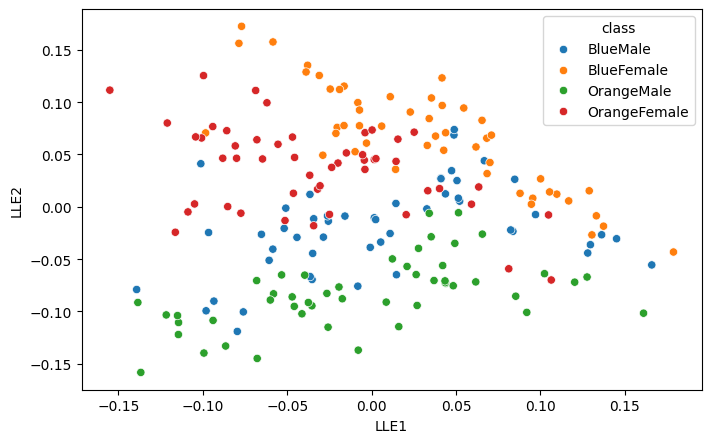

In [40]:
fig = plt.figure(figsize=(8, 8/1.618));

sns.scatterplot(x="LLE1", y="LLE2", hue="class", data=df_scaled)

## 3D LLE

Try it again but with 3 components.

In [53]:
df = pd.read_csv("crabs.csv")

df.rename(columns={
    "sp": "species", "FL": "Frontal Lobe", "RW": "Rear Width", "CL": "Carapace Midline", "CW": "Maximum Width", "BD": "Body Depth"
}, inplace=True)

# remap cat var designator
df["species"] = df["species"].map({
    "B": "Blue", "O": "Orange"
})

df["sex"] = df["sex"].map({
    "M": "Male", "F": "Female"
})

# Add a species designation, whic is going to be unique combo of sex and species
df["class"] = df["species"] + df["sex"]

data_columns = ["Frontal Lobe", "Rear Width", "Carapace Midline", "Maximum Width"]

df

,rownames,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
0,1,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,2,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,3,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,4,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,5,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale
...,...,...,...,...,...,...,...,...,...,...
195,196,Orange,Female,46,21.4,18.0,41.2,46.2,18.7,OrangeFemale
196,197,Orange,Female,47,21.7,17.1,41.7,47.2,19.6,OrangeFemale
197,198,Orange,Female,48,21.9,17.2,42.6,47.4,19.5,OrangeFemale
198,199,Orange,Female,49,22.5,17.2,43.0,48.7,19.8,OrangeFemale


In [54]:
df_scaled = df.copy(deep=True)

df_scaled[data_columns] = MinMaxScaler().fit_transform(df_scaled[data_columns])

lle = LocallyLinearEmbedding(n_components=3, n_neighbors=15)
df_lle = lle.fit_transform(df_scaled[data_columns])
print("Reconstruction Error\n", lle.reconstruction_error_)

df_scaled[["LLE1", "LLE2", "LLE3"]] = df_lle

Reconstruction Error
 4.177604979140539e-05


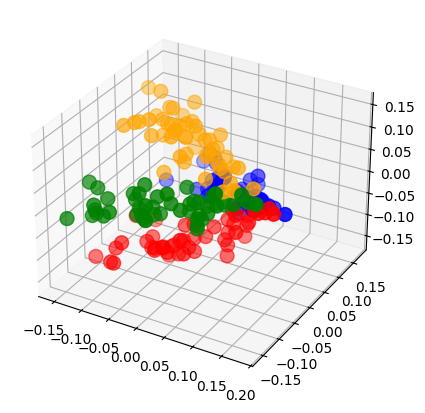

In [64]:
fig = plt.figure(figsize=(8, 8/1.618));
ax = fig.add_subplot(111, projection="3d");

color = {"BlueFemale": "blue", "BlueMale": "red", "OrangeMale": "g", "OrangeFemale": "orange"}
plt.scatter(df_scaled["LLE1"], df_scaled["LLE2"], zs=df_scaled["LLE3"], c=df_scaled["class"].apply(lambda x: color[x]), s=100)